In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow import keras

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/detection"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')
dataset=[]
lab=[]
for image_name in no_images:
    image=cv2.imread(folder_path + '/no/' + image_name)
    image=Image.fromarray(image)
    image=image.resize((512,512))
    dataset.append(np.array(image))
    lab.append(0)
    
for image_name in yes_images:
    image=cv2.imread(folder_path + '/yes/' + image_name)
    image=Image.fromarray(image)
    image=image.resize((512,512))
    dataset.append(np.array(image))
    lab.append(1)

In [ ]:
X,y = np.array(dataset), np.array(lab) 

In [ ]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=X[0].shape),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

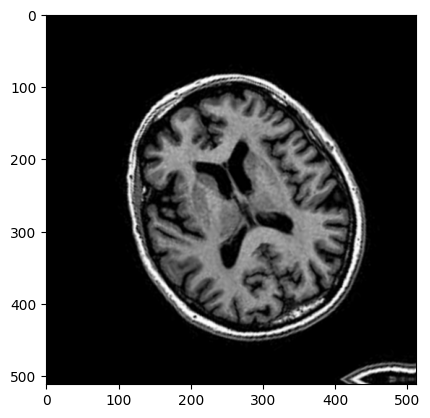

In [ ]:
plt.imshow(data_augmentation(X)[10].numpy().astype("uint8")) 

In [ ]:
rede_google = MobileNetV2(X[0].shape,include_top=False,weights="imagenet") 

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
rede_google.trainable = False 

In [ ]:
media_global = keras.layers.GlobalAveragePooling2D() 

In [ ]:
predictor = keras.layers.Dense(1) 

In [ ]:
MODELO = keras.Sequential([data_augmentation,rede_google,media_global,predictor]) 

In [ ]:
MODELO.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 16, 16, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
taxa_de_apredizado = 0.001
MODELO.compile(optimizer=keras.optimizers.RMSprop(learning_rate=taxa_de_apredizado),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=["accuracy"])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1,random_state=True) 

In [ ]:
history = MODELO.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test))

Epoch 1/80
8/8 [==============================] - 6s 299ms/step - loss: 1.9620 - accuracy: 0.9339 - val_loss: 17.7271 - val_accuracy: 0.7308
Epoch 2/80
8/8 [==============================] - 2s 188ms/step - loss: 2.8726 - accuracy: 0.9295 - val_loss: 17.3903 - val_accuracy: 0.7308
Epoch 3/80
8/8 [==============================] - 2s 210ms/step - loss: 2.5502 - accuracy: 0.9075 - val_loss: 17.0927 - val_accuracy: 0.7308
Epoch 4/80
8/8 [==============================] - 1s 187ms/step - loss: 2.8464 - accuracy: 0.9383 - val_loss: 16.6817 - val_accuracy: 0.7308
Epoch 5/80
8/8 [==============================] - 2s 215ms/step - loss: 2.1731 - accuracy: 0.9119 - val_loss: 16.5766 - val_accuracy: 0.7308
Epoch 6/80
8/8 [==============================] - 2s 219ms/step - loss: 2.5024 - accuracy: 0.9075 - val_loss: 16.3747 - val_accuracy: 0.7308
Epoch 7/80
8/8 [==============================] - 2s 219ms/step - loss: 2.9667 - accuracy: 0.9119 - val_loss: 16.1488 - val_accuracy: 0.7308
Epoch 8/80
8/

In [ ]:
#fine-tuning 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=X_train[0].shape)

# Make all layers in the base model non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a low learning rate
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))



Epoch 1/10
8/8 [==============================] - 6s 316ms/step - loss: 47.9598 - accuracy: 0.6564 - val_loss: 33.0883 - val_accuracy: 0.6538
Epoch 2/10
8/8 [==============================] - 2s 204ms/step - loss: 10.7733 - accuracy: 0.8282 - val_loss: 6.8006 - val_accuracy: 0.8462
Epoch 3/10
8/8 [==============================] - 2s 205ms/step - loss: 4.5757 - accuracy: 0.9427 - val_loss: 20.2823 - val_accuracy: 0.7692
Epoch 4/10
8/8 [==============================] - 2s 203ms/step - loss: 3.1907 - accuracy: 0.9163 - val_loss: 5.4755 - val_accuracy: 0.8462
Epoch 5/10
8/8 [==============================] - 2s 204ms/step - loss: 6.6482 - accuracy: 0.9339 - val_loss: 11.7955 - val_accuracy: 0.8846
Epoch 6/10
8/8 [==============================] - 2s 204ms/step - loss: 1.6456 - accuracy: 0.9559 - val_loss: 5.7426 - val_accuracy: 0.9231
Epoch 7/10
8/8 [==============================] - 2s 236ms/step - loss: 0.3465 - accuracy: 0.9868 - val_loss: 1.7420 - val_accuracy: 0.9615
Epoch 8/10
8/8 

In [ ]:
# train history
data = pd.DataFrame(history.history)
data[-5:]

,loss,accuracy,val_loss,val_accuracy
75,0.342609,0.872247,0.514277,0.846154
76,0.330871,0.859031,0.511865,0.807692
77,0.331933,0.859031,0.582501,0.769231
78,0.308969,0.916300,0.512921,0.846154
79,0.323857,0.867841,0.495134,0.846154


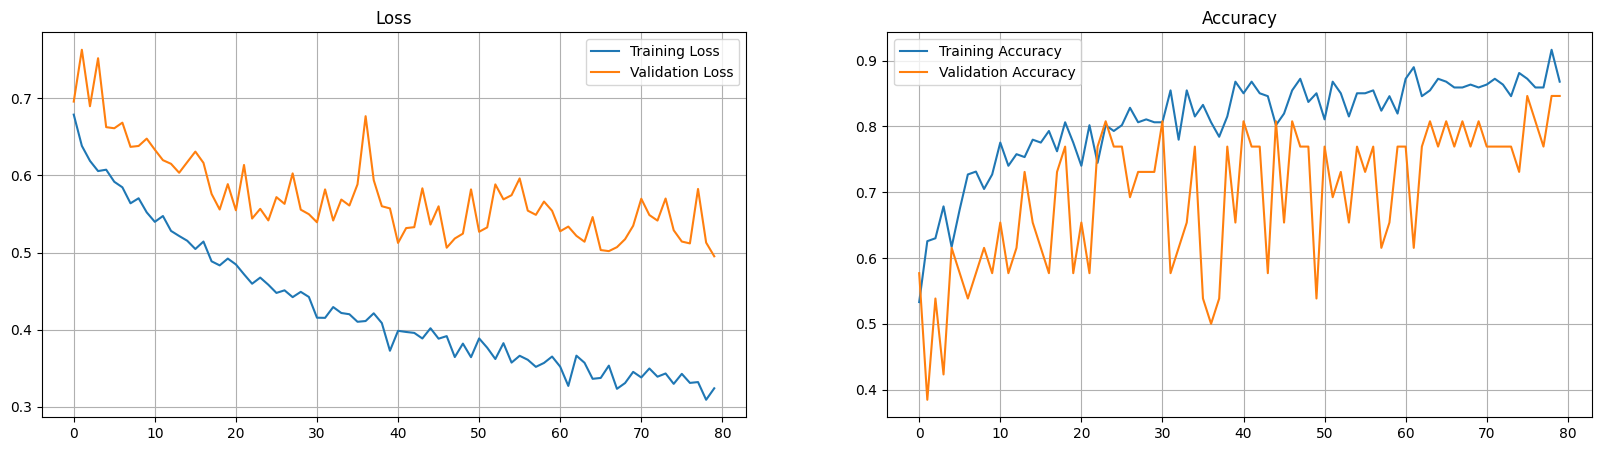

In [ ]:
# plotting training / validation history
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(data.loss, label='Training Loss')
plt.plot(data.val_loss, label='Validation Loss')
plt.title("Loss")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(data.accuracy, label='Training Accuracy')
plt.plot(data.val_accuracy, label='Validation Accuracy')
plt.title("Accuracy")
plt.grid()
plt.legend()

plt.show()